In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
production = pd.read_csv('../raw_data/Production_Cleaned.csv', encoding = 'unicode_escape')
production.head()

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,CHP,PRR_AUTO,GEP,CF,GWH,AL,False,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,A,CHP,PRR_AUTO,GEP,CF,GWH,AT,True,3025000,3888000,...,5209027,4690911,4453396,4067491,4142426,4331098,4536887,4108578,4170416,4037880
2,A,CHP,PRR_AUTO,GEP,CF,GWH,BA,False,:,:,...,:,:,:,0.000,0.000,0.000,0.000,0.000,0.000,29000
3,A,CHP,PRR_AUTO,GEP,CF,GWH,BE,True,0.000,0.000,...,5441300,6023200,6161500,6429000,6476100,6820600,7589700,7728100,9114800,9366900
4,A,CHP,PRR_AUTO,GEP,CF,GWH,BG,True,3882000,2995000,...,124000,255000,251000,233000,360000,399000,583165,637454,636997,650121


In [4]:
production.nrg_bal.nunique()

4

In [5]:
production.describe()

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,14190,14190,14190,14190,14190,14190,14190,14190,14190,14190,...,14190,14190,14190,14190,14190,14190,14190,14190,14190,14190
unique,1,4,3,4,13,2,43,2,1237,1254,...,2093,2121,2140,2199,2255,2282,2413,2436,2445,2363
top,A,TOTAL,PRR_AUTO,GEP,CF,GWH,AL,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
freq,14190,5074,4816,3741,1548,7482,330,8910,9066,9048,...,8331,8290,8556,9062,9027,8947,8890,8831,8815,8630


In [6]:
EU_countries = pd.DataFrame.from_dict([{'Belgium': 'BE', 'Bulgaria': 'BG', 'Czechia': 'CZ', 'Denmark': 'DK', 'Germany': 'DE', 'Estonia': 'EE', 'Ireland': 'IE', 'Greece': 'EL',
                'Spain': 'ES', 'France': 'FR', 'Croatia': 'HR', 'Italy': 'IT', 'Cyprus': 'CY', 'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 
                'Hungary': 'HU', 'Malta': 'MT', 'Netherlands': 'NL', 'Austria': 'AT', 'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovenia': 'SI',
                'Slovakia': 'SK', 'Finland': 'FI', 'Sweden': 'SE'}])
EU_countries = EU_countries.T.reset_index()
EU_countries.rename(columns={'index': 'EU_country', 0: 'Alpha_2_code'}, inplace=True)
EU_countries.head()


,EU_country,Alpha_2_code
0,Belgium,BE
1,Bulgaria,BG
2,Czechia,CZ
3,Denmark,DK
4,Germany,DE


In [7]:
EU_countries.EU_country.nunique()

27

In [8]:
electricity_sources = pd.DataFrame.from_dict([{'Total': 'TOTAL', 
 'Combustible fuels': 'CF', 
 'Hydro': 'RA100',
 'Pumped hydro power': 'RA130',
 'Geothermal': 'RA200',
 'Wind': 'RA300',
 'Solar': 'RA400',
 'Tide, wave, ocean': 'RA500',
 'Ambient heat (heat pumps)': 'RA600',
 'Nuclear fuels and other fuels n.e.c.': 'N9000',
 'Electricity': 'E7000',
 'Other fuels n.e.c. - heat from chemical sources': 'X9900H',
 'Other fuels n.e.c.': 'X9900'}])
electricity_sources=electricity_sources.T.reset_index()
electricity_sources.rename(columns={'index': 'elec_source', 0: 'elec_source_code'}, inplace=True)
electricity_sources

,elec_source,elec_source_code
0,Total,TOTAL
1,Combustible fuels,CF
2,Hydro,RA100
3,Pumped hydro power,RA130
4,Geothermal,RA200
5,Wind,RA300
6,Solar,RA400
7,"Tide, wave, ocean",RA500
8,Ambient heat (heat pumps),RA600
9,Nuclear fuels and other fuels n.e.c.,N9000


In [9]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14190 entries, 0 to 14189
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   freq          14190 non-null  object
 1   plants        14190 non-null  object
 2   operator      14190 non-null  object
 3   nrg_bal       14190 non-null  object
 4   siec          14190 non-null  object
 5   unit          14190 non-null  object
 6   Alpha_2_code  14190 non-null  object
 7   EU?           14190 non-null  bool  
 8   1990          14190 non-null  object
 9   1991          14190 non-null  object
 10  1992          14190 non-null  object
 11  1993          14190 non-null  object
 12  1994          14190 non-null  object
 13  1995          14190 non-null  object
 14  1996          14190 non-null  object
 15  1997          14190 non-null  object
 16  1998          14190 non-null  object
 17  1999          14190 non-null  object
 18  2000          14190 non-null  object
 19  2001

# Filtering Electricity Production data to EU-27 Countries only (excluding the UK)

In [10]:
production.Alpha_2_code.unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'GE', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LI', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO',
       'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UA', 'UK', 'XK'],
      dtype=object)

In [11]:
production.Alpha_2_code.nunique()

43

In [12]:
countries = pd.read_csv('../raw_data/CountryCodes.csv', encoding = 'unicode_escape')
countries.head()

,Country,Alpha_2_code,Alpha_3_code,Numeric
0,Afghanistan,AF,AFG,4.0
1,Albania,AL,ALB,8.0
2,Algeria,DZ,DZA,12.0
3,American Samoa,AS,ASM,16.0
4,Andorra,AD,AND,20.0


In [13]:
countries.Country.nunique()

249

In [14]:
production = production.merge(countries, on='Alpha_2_code', how='left')
production['EU?'] = production['Alpha_2_code'].isin(EU_countries['Alpha_2_code'])
production.sample(10)

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
12115,A,TOTAL,PRR_MAIN,NEP,X9900H,GWH,PL,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Poland,POL,616.0
3768,A,CHP,TOTAL,NHP,N9000,TJ,ME,False,:,:,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Montenegro,MNE,499.0
5973,A,ELC,TOTAL,GEP,CF,GWH,TR,False,31172000,34261000,...,191482000,170576000,176143000,202224358,198712176,160898927,168824075,Turkey,TUR,792.0
6714,A,ELC,TOTAL,NEP,RA500,GWH,CZ,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Czechia,CZE,203.0
2175,A,CHP,PRR_MAIN,NEP,RA400,GWH,LV,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Latvia,LVA,428.0
10329,A,TOTAL,PRR_AUTO,NEP,TOTAL,GWH,EA19,False,166925949,167982488,...,167531432,179260243,182827707,192375119,201832264,206445431,205698765,NaN,NaN,NaN
374,A,CHP,PRR_AUTO,GHP,E7000,TJ,NL,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Netherlands (the),NLD,528.0
14082,A,TOTAL,TOTAL,NHP,TOTAL,TJ,IT,True,0.000,0.000,...,205886000,216934000,223838000,233414088,229481430,231235079,228444101,Italy,ITA,380.0
2358,A,CHP,PRR_MAIN,NHP,CF,TJ,SE,True,36779000,47894000,...,107687000,111042000,119369000,116017000,118958000,115517000,104371000,Sweden,SWE,752.0
12997,A,TOTAL,TOTAL,GHP,E7000,TJ,EL,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Greece,GRC,300.0


In [15]:
energy_balance = pd.read_csv('../raw_data/Energy_Balance.csv', sep=':', encoding = 'unicode_escape' )
energy_balance.head()

,energy_balance,nrg_bal
0,Imports,IMP
1,Exports,EXP
2,Inlanddemand,ID
3,Transformationinput-electricityandheatgenerati...,TI_EHG_EDHP
4,Transformationinput-electricityandheatgenerati...,TI_EHG_EB


In [16]:
energy_balance.nrg_bal.unique()

array(['IMP', 'EXP', 'ID', 'TI_EHG_EDHP', 'TI_EHG_EB', 'TI_EHG_EPS_PURE',
       'TI_EHG_EPS_MIX', 'NRG_E', 'NRG_EHG_E', 'NRG_CM_E', 'NRG_OIL_NG_E',
       'NRG_PF_E', 'NRG_CO_E', 'NRG_BKBPB_E', 'NRG_GW_E', 'NRG_BF_E',
       '[NRG_PR_E]', 'NRG_NI_E', 'NRG_CL_E', 'NRG_LNG_E', 'NRG_BIOG_E',
       'NRG_GTL_E', 'NRG_CPP_E', 'NRG_NSP_E', 'DL', 'AFC', 'FC',
       'FC_IND_E', 'FC_IND_IS_E', 'FC_IND_CPC_E', 'FC_IND_NFM_E',
       'FC_IND_NMM_E', 'FC_IND_TE_E', 'FC_IND_MAC_E', 'FC_IND_MQ_E',
       'FC_IND_FBT_E', 'FC_IND_PPP_E', 'FC_IND_WP_E', 'FC_IND_CON_E',
       'FC_IND_TL_E', 'FC_IND_NSP_E', 'FC_TRA_E', 'FC_TRA_RAIL_E',
       'FC_TRA_ROAD_E', 'FC_TRA_PIPE_E', 'FC_TRA_NSP_E', 'FC_OTH_CP_E',
       'FC_OTH_HH_E', 'FC_OTH_AF_E', 'FC_OTH_FISH_E', 'FC_OTH_NSP_E',
       'STATDIFF', 'GEP', 'NEP'], dtype=object)

In [17]:
energy_balance.energy_balance.nunique()

54

In [18]:
# production = production[['Alpha_2_code','Country','EU?','Alpha_3_code','nrg_bal','freq','plants', 'operator', 'unit', 
#                            '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
#                            '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
#                            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
#                            '2017', '2018', '2019', '2020']]
# production.head()

In [19]:
EU_production = production.loc[production['EU?'] == True]
EU_production

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
1,A,CHP,PRR_AUTO,GEP,CF,GWH,AT,True,3025000,3888000,...,4067491,4142426,4331098,4536887,4108578,4170416,4037880,Austria,AUT,40.0
3,A,CHP,PRR_AUTO,GEP,CF,GWH,BE,True,0.000,0.000,...,6429000,6476100,6820600,7589700,7728100,9114800,9366900,Belgium,BEL,56.0
4,A,CHP,PRR_AUTO,GEP,CF,GWH,BG,True,3882000,2995000,...,233000,360000,399000,583165,637454,636997,650121,Bulgaria,BGR,100.0
5,A,CHP,PRR_AUTO,GEP,CF,GWH,CY,True,0.000,0.000,...,38000,37000,38000,40524,43707,43736,45608,Cyprus,CYP,196.0
6,A,CHP,PRR_AUTO,GEP,CF,GWH,CZ,True,6627000,6426000,...,8441000,8566000,8738000,8395537,8166103,8043096,7276411,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,A,TOTAL,TOTAL,NHP,X9900H,TJ,PT,True,0.000,0.000,...,55000,87000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
14181,A,TOTAL,TOTAL,NHP,X9900H,TJ,RO,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
14183,A,TOTAL,TOTAL,NHP,X9900H,TJ,SE,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
14184,A,TOTAL,TOTAL,NHP,X9900H,TJ,SI,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [20]:
EU_production.shape, production.shape

((8910, 42), (14190, 42))

# Missing & Duplicate values in EU Electricity Production

We are also limiting ourselves to only EU Electricity Production data here by excluding GHP and NHP

In [21]:
EU_production.isna().sum().sum()

0

In [22]:
sum(EU_production.duplicated())

0

In [23]:
production.plants.unique()

array(['CHP', 'ELC', 'HEAT', 'TOTAL'], dtype=object)

In [24]:
production.operator.unique()

array(['PRR_AUTO', 'PRR_MAIN', 'TOTAL'], dtype=object)

In [25]:
EU_production_annual = EU_production.loc[EU_production['unit'] == 'GWH']
EU_production_annual

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
1,A,CHP,PRR_AUTO,GEP,CF,GWH,AT,True,3025000,3888000,...,4067491,4142426,4331098,4536887,4108578,4170416,4037880,Austria,AUT,40.0
3,A,CHP,PRR_AUTO,GEP,CF,GWH,BE,True,0.000,0.000,...,6429000,6476100,6820600,7589700,7728100,9114800,9366900,Belgium,BEL,56.0
4,A,CHP,PRR_AUTO,GEP,CF,GWH,BG,True,3882000,2995000,...,233000,360000,399000,583165,637454,636997,650121,Bulgaria,BGR,100.0
5,A,CHP,PRR_AUTO,GEP,CF,GWH,CY,True,0.000,0.000,...,38000,37000,38000,40524,43707,43736,45608,Cyprus,CYP,196.0
6,A,CHP,PRR_AUTO,GEP,CF,GWH,CZ,True,6627000,6426000,...,8441000,8566000,8738000,8395537,8166103,8043096,7276411,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,A,TOTAL,TOTAL,NEP,X9900H,GWH,PT,True,0.000,0.000,...,6000,8000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
13794,A,TOTAL,TOTAL,NEP,X9900H,GWH,RO,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
13796,A,TOTAL,TOTAL,NEP,X9900H,GWH,SE,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
13797,A,TOTAL,TOTAL,NEP,X9900H,GWH,SI,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [26]:
EU_production_annual = EU_production_annual.loc[EU_production_annual['operator'] == 'TOTAL']
EU_production_annual

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
2667,A,CHP,TOTAL,GEP,CF,GWH,AT,True,8651000,9780000,...,8652380,8991979,10608317,9619195,9645089,9951487,9844045,Austria,AUT,40.0
2669,A,CHP,TOTAL,GEP,CF,GWH,BE,True,7316000,7781000,...,13473900,14572000,15034700,14995300,15578500,15732400,16356800,Belgium,BEL,56.0
2670,A,CHP,TOTAL,GEP,CF,GWH,BG,True,11267000,12592000,...,5110000,3954000,3903000,3801011,3843730,5229469,5337851,Bulgaria,BGR,100.0
2671,A,CHP,TOTAL,GEP,CF,GWH,CY,True,0.000,0.000,...,51000,51000,52000,55450,57982,57920,60639,Cyprus,CYP,196.0
2672,A,CHP,TOTAL,GEP,CF,GWH,CZ,True,11247000,11178000,...,17007494,17060418,17017068,16586833,16016339,15748713,15960977,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,A,TOTAL,TOTAL,NEP,X9900H,GWH,PT,True,0.000,0.000,...,6000,8000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
13794,A,TOTAL,TOTAL,NEP,X9900H,GWH,RO,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
13796,A,TOTAL,TOTAL,NEP,X9900H,GWH,SE,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
13797,A,TOTAL,TOTAL,NEP,X9900H,GWH,SI,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [27]:
EU_production_annual = EU_production_annual.loc[EU_production_annual['plants'] == 'TOTAL']
EU_production_annual

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
12471,A,TOTAL,TOTAL,GEP,CF,GWH,AT,True,17787000,18738000,...,15960532,18915528,18953348,21296019,19899794,20865145,18367744,Austria,AUT,40.0
12473,A,TOTAL,TOTAL,GEP,CF,GWH,BE,True,27297000,28088000,...,29448800,33088100,31558500,32615100,33170500,34497400,35272500,Belgium,BEL,56.0
12474,A,TOTAL,TOTAL,GEP,CF,GWH,BG,True,25598000,25237000,...,23858000,24840000,22088000,23633310,22606489,21573287,17827048,Bulgaria,BGR,100.0
12475,A,TOTAL,TOTAL,GEP,CF,GWH,CY,True,1974000,2077000,...,4084000,4186000,4515000,4620904,4640034,4684659,4313185,Cyprus,CYP,196.0
12476,A,TOTAL,TOTAL,GEP,CF,GWH,CZ,True,48525000,47077000,...,50174000,51063000,53279000,52782940,52338026,50474011,44932588,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,A,TOTAL,TOTAL,NEP,X9900H,GWH,PT,True,0.000,0.000,...,6000,8000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
13794,A,TOTAL,TOTAL,NEP,X9900H,GWH,RO,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
13796,A,TOTAL,TOTAL,NEP,X9900H,GWH,SE,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
13797,A,TOTAL,TOTAL,NEP,X9900H,GWH,SI,True,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [28]:
EU_production_annual = EU_production_annual.loc[EU_production_annual['siec'] == 'TOTAL']
EU_production_annual

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
12815,A,TOTAL,TOTAL,GEP,TOTAL,GWH,AT,True,50294000,51483000,...,65438872,65299423,68308186,71324414,68617889,74234304,72566304,Austria,AUT,40.0
12817,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BE,True,70923000,71936000,...,72545300,69708200,85607500,86616300,75036800,93639800,89389000,Belgium,BEL,56.0
12818,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BG,True,42141000,40862000,...,47485000,49228000,45277000,45612786,46837670,44301773,40766577,Bulgaria,BGR,100.0
12819,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CY,True,1974000,2077000,...,4350440,4534516,4887638,5004365,5060567,5141491,4849201,Cyprus,CYP,196.0
12820,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CZ,True,62559000,60528000,...,86148000,83892000,83309000,87050264,88032022,87030605,81517186,Czechia,CZE,203.0
12821,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DE,True,550015000,539634000,...,627806000,648309000,650449000,653723000,640468000,606917000,572666000,Germany,DEU,276.0
12822,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DK,True,25982000,36545000,...,32184012,28940632,30538406,31022552,30369763,29522796,28733603,Denmark,DNK,208.0
12824,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EE,True,17206000,14627000,...,12446000,10148830,12169924,13160460,12364171,7615585,5955864,Estonia,EST,233.0
12825,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EL,True,35003000,35815000,...,50474000,51874000,54438584,55266089,53262785,48626171,48251884,Greece,GRC,300.0
12826,A,TOTAL,TOTAL,GEP,TOTAL,GWH,ES,True,151923000,155801000,...,278749282,280911454,274771767,275726000,274452000,273257000,263373000,Spain,ESP,724.0


In [29]:
EU_production_annual.shape

(54, 42)

In [30]:
columns = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [31]:
# EU_production_annual[columns]= pd.to_numeric(EU_production_annual[columns], errors = 'coerce') this will work in a for loop

In [32]:
EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')

In [33]:
# EU_production_annual[['2020']].groupby('Country', 'nrg_bal').sum()


In [34]:
EU_production_annual_nrg_bal = EU_production_annual.groupby('nrg_bal').sum()
EU_production_annual_nrg_bal

,EU?,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Numeric
nrg_bal,,,,,,,,,,,,,,,,,,,,,
GEP,27,2275281947,2316881435,2303092577,2303270775,2340447875,2409566590,2495065526,2506432756,2560071021,...,2939143048,2920967479,2861344080,2906580318,2928142407,2960918324,2943002100,2907181919,2786007913,10469.0
NEP,27,2132426596,2173244121,2164366067,2166376328,2201616751,2268070468,2349735060,2363865428,2416847448,...,2787010758,2774246611,2716847701,2760960106,2784039893,2814920542,2802323762,2776012131,2664236011,10469.0


In [35]:
# EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

In [36]:
# # Adding EU Total Production by year as a separate dataframe
# EU_Total_NEP = EU_production_annual.loc[EU_production_annual['nrg_bal'] == 'NEP']
# EU_Total_NEP = pd.DataFrame(EU_production_annual[columns].sum())
# EU_Total_NEP = EU_Total_NEP.rename(columns={0:'NEP'})
# EU_Total_NEP

In [37]:
# EU_Total_GEP = EU_production_annual.loc[EU_production_annual['nrg_bal'] == 'GEP']
# EU_Total_GEP = pd.DataFrame(EU_production_annual[columns].sum())
# EU_Total_GEP = EU_Total_GEP.rename(columns={0:'GEP'})
# EU_Total_GEP

In [38]:
# EU_Total_NEP.plot();
# EU_Total_GEP.plot();

In [39]:
# EU_Total_NEP.dtypes

In [40]:
EU_production_annual

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,EU?,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
12815,A,TOTAL,TOTAL,GEP,TOTAL,GWH,AT,True,50294000,51483000,...,65438872,65299423,68308186,71324414,68617889,74234304,72566304,Austria,AUT,40.0
12817,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BE,True,70923000,71936000,...,72545300,69708200,85607500,86616300,75036800,93639800,89389000,Belgium,BEL,56.0
12818,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BG,True,42141000,40862000,...,47485000,49228000,45277000,45612786,46837670,44301773,40766577,Bulgaria,BGR,100.0
12819,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CY,True,1974000,2077000,...,4350440,4534516,4887638,5004365,5060567,5141491,4849201,Cyprus,CYP,196.0
12820,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CZ,True,62559000,60528000,...,86148000,83892000,83309000,87050264,88032022,87030605,81517186,Czechia,CZE,203.0
12821,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DE,True,550015000,539634000,...,627806000,648309000,650449000,653723000,640468000,606917000,572666000,Germany,DEU,276.0
12822,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DK,True,25982000,36545000,...,32184012,28940632,30538406,31022552,30369763,29522796,28733603,Denmark,DNK,208.0
12824,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EE,True,17206000,14627000,...,12446000,10148830,12169924,13160460,12364171,7615585,5955864,Estonia,EST,233.0
12825,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EL,True,35003000,35815000,...,50474000,51874000,54438584,55266089,53262785,48626171,48251884,Greece,GRC,300.0
12826,A,TOTAL,TOTAL,GEP,TOTAL,GWH,ES,True,151923000,155801000,...,278749282,280911454,274771767,275726000,274452000,273257000,263373000,Spain,ESP,724.0


In [41]:
EU_production_1990 = EU_production_annual['1990'].sum()
EU_production_1990

4407708543

In [42]:
# EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

In [43]:
EU_production_annual.drop(columns=['EU?'],inplace= True)

In [44]:
EU_production_annual.isna().sum().sum()

0

In [45]:
sum(EU_production_annual.duplicated())

0

Looks like there are missing, null and duplicates in EU Production which includes are types of plants and EU Production (Operator = Total) . Need to understand if they are legit before treating them

In [46]:
EU_production_annual.groupby('Alpha_2_code').count()

,freq,plants,operator,nrg_bal,siec,unit,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BG,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CY,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CZ,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
DE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
DK,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
EE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
EL,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [47]:
EU_production_annual_missing_val = EU_production_annual.groupby('Alpha_2_code').aggregate(lambda serie: serie.eq(': ').sum())
EU_production_annual_missing_val

,freq,plants,operator,nrg_bal,siec,unit,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
missing_production_data_countries = EU_production_annual_missing_val[EU_production_annual_missing_val.sum(axis=1) != 0]
missing_production_data_countries


,freq,plants,operator,nrg_bal,siec,unit,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,


In [49]:
EU_production_annual_float = EU_production_annual.loc[:, '1990':'2020'].replace(': ',np.nan).astype(float)
EU_production_annual_float

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12815,50294000.0,51483000.0,51190000.0,52421000.0,53132000.0,56225000.0,54880000.0,56704000.0,57001000.0,60944000.0,...,65813093.0,72603457.0,68356635.0,65438872.0,65299423.0,68308186.0,71324414.0,68617889.0,74234304.0,72566304.0
12817,70923000.0,71936000.0,72225000.0,70834000.0,72179000.0,74408000.0,76099000.0,78833000.0,83183000.0,84514000.0,...,90587900.0,83036100.0,83497700.0,72545300.0,69708200.0,85607500.0,86616300.0,75036800.0,93639800.0,89389000.0
12818,42141000.0,40862000.0,35610000.0,37997000.0,38133000.0,41789000.0,42716000.0,42803000.0,41711000.0,38248000.0,...,50797000.0,47329000.0,43784000.0,47485000.0,49228000.0,45277000.0,45612786.0,46837670.0,44301773.0,40766577.0
12819,1974000.0,2077000.0,2430000.0,2590000.0,2685000.0,2497000.0,2609000.0,2728000.0,2991000.0,3139000.0,...,4929602.0,4717023.0,4290145.0,4350440.0,4534516.0,4887638.0,5004365.0,5060567.0,5141491.0,4849201.0
12820,62559000.0,60528000.0,59293000.0,58881000.0,58705000.0,60847000.0,64257000.0,64598000.0,65112000.0,64694000.0,...,87477000.0,87418000.0,86913000.0,86148000.0,83892000.0,83309000.0,87050264.0,88032022.0,87030605.0,81517186.0
12821,550015000.0,539634000.0,537470000.0,526276000.0,529160000.0,537284000.0,555372000.0,551554000.0,556393000.0,556300000.0,...,613123000.0,628314000.0,638701000.0,627806000.0,648309000.0,650449000.0,653723000.0,640468000.0,606917000.0,572666000.0
12822,25982000.0,36545000.0,30738000.0,33974000.0,40578000.0,36759000.0,53582000.0,44315000.0,41113000.0,38920000.0,...,35229069.0,30700702.0,34742088.0,32184012.0,28940632.0,30538406.0,31022552.0,30369763.0,29522796.0,28733603.0
12824,17206000.0,14627000.0,11831000.0,9117000.0,9152000.0,8693000.0,9103000.0,9218000.0,8557000.0,8278000.0,...,12893000.0,11967000.0,13275000.0,12446000.0,10148830.0,12169924.0,13160460.0,12364171.0,7615585.0,5955864.0
12825,35003000.0,35815000.0,37411000.0,38396000.0,40624000.0,41552000.0,42567000.0,43506000.0,46329000.0,49632000.0,...,59436000.0,60959000.0,57152000.0,50474000.0,51874000.0,54438584.0,55266089.0,53262785.0,48626171.0,48251884.0
12826,151923000.0,155801000.0,158722000.0,156802000.0,161853000.0,167090000.0,174459000.0,190402000.0,195216000.0,208247000.0,...,293847000.0,297558624.0,285631120.0,278749282.0,280911454.0,274771767.0,275726000.0,274452000.0,273257000.0,263373000.0


In [50]:
EU_production_annual_float = pd.merge(EU_production_annual.loc[:, :'Alpha_2_code'], EU_production_annual_float, left_index=True, right_index=True)
EU_production_annual_float

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12815,A,TOTAL,TOTAL,GEP,TOTAL,GWH,AT,50294000.0,51483000.0,51190000.0,...,65813093.0,72603457.0,68356635.0,65438872.0,65299423.0,68308186.0,71324414.0,68617889.0,74234304.0,72566304.0
12817,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BE,70923000.0,71936000.0,72225000.0,...,90587900.0,83036100.0,83497700.0,72545300.0,69708200.0,85607500.0,86616300.0,75036800.0,93639800.0,89389000.0
12818,A,TOTAL,TOTAL,GEP,TOTAL,GWH,BG,42141000.0,40862000.0,35610000.0,...,50797000.0,47329000.0,43784000.0,47485000.0,49228000.0,45277000.0,45612786.0,46837670.0,44301773.0,40766577.0
12819,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CY,1974000.0,2077000.0,2430000.0,...,4929602.0,4717023.0,4290145.0,4350440.0,4534516.0,4887638.0,5004365.0,5060567.0,5141491.0,4849201.0
12820,A,TOTAL,TOTAL,GEP,TOTAL,GWH,CZ,62559000.0,60528000.0,59293000.0,...,87477000.0,87418000.0,86913000.0,86148000.0,83892000.0,83309000.0,87050264.0,88032022.0,87030605.0,81517186.0
12821,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DE,550015000.0,539634000.0,537470000.0,...,613123000.0,628314000.0,638701000.0,627806000.0,648309000.0,650449000.0,653723000.0,640468000.0,606917000.0,572666000.0
12822,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DK,25982000.0,36545000.0,30738000.0,...,35229069.0,30700702.0,34742088.0,32184012.0,28940632.0,30538406.0,31022552.0,30369763.0,29522796.0,28733603.0
12824,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EE,17206000.0,14627000.0,11831000.0,...,12893000.0,11967000.0,13275000.0,12446000.0,10148830.0,12169924.0,13160460.0,12364171.0,7615585.0,5955864.0
12825,A,TOTAL,TOTAL,GEP,TOTAL,GWH,EL,35003000.0,35815000.0,37411000.0,...,59436000.0,60959000.0,57152000.0,50474000.0,51874000.0,54438584.0,55266089.0,53262785.0,48626171.0,48251884.0
12826,A,TOTAL,TOTAL,GEP,TOTAL,GWH,ES,151923000.0,155801000.0,158722000.0,...,293847000.0,297558624.0,285631120.0,278749282.0,280911454.0,274771767.0,275726000.0,274452000.0,273257000.0,263373000.0


In [51]:
EU_production_annual_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 12815 to 13712
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   freq          54 non-null     object 
 1   plants        54 non-null     object 
 2   operator      54 non-null     object 
 3   nrg_bal       54 non-null     object 
 4   siec          54 non-null     object 
 5   unit          54 non-null     object 
 6   Alpha_2_code  54 non-null     object 
 7   1990          54 non-null     float64
 8   1991          54 non-null     float64
 9   1992          54 non-null     float64
 10  1993          54 non-null     float64
 11  1994          54 non-null     float64
 12  1995          54 non-null     float64
 13  1996          54 non-null     float64
 14  1997          54 non-null     float64
 15  1998          54 non-null     float64
 16  1999          54 non-null     float64
 17  2000          54 non-null     float64
 18  2001          54 non-null

In [52]:
EU_production_annual_float.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,8.162423e+07,8.315047e+07,8.273072e+07,8.277124e+07,8.411231e+07,8.662291e+07,8.971853e+07,9.019071e+07,9.216516e+07,9.311421e+07,...,1.061216e+08,1.060399e+08,1.054669e+08,1.032998e+08,1.049545e+08,1.057812e+08,1.069600e+08,1.063949e+08,1.052443e+08,1.009304e+08
std,1.233582e+08,1.258754e+08,1.270988e+08,1.264611e+08,1.275614e+08,1.309546e+08,1.351051e+08,1.345404e+08,1.362379e+08,1.384998e+08,...,1.548093e+08,1.570961e+08,1.583317e+08,1.554210e+08,1.591474e+08,1.575348e+08,1.580914e+08,1.583560e+08,1.536678e+08,1.445043e+08
min,1.010000e+06,1.314000e+06,1.153000e+06,1.021000e+06,1.107000e+06,1.192000e+06,1.227000e+06,1.234000e+06,1.255000e+06,1.008000e+06,...,2.053000e+06,2.172000e+06,2.137000e+06,2.137000e+06,1.240990e+06,8.065420e+05,1.602516e+06,1.912270e+06,1.877378e+06,2.080800e+06
25%,1.475450e+07,1.433900e+07,1.301725e+07,1.209625e+07,1.047175e+07,1.249600e+07,1.357650e+07,1.320650e+07,1.428275e+07,1.304975e+07,...,1.342000e+07,1.265175e+07,1.431825e+07,1.428700e+07,1.209900e+07,1.350150e+07,1.371956e+07,1.408427e+07,1.337631e+07,1.411139e+07
50%,3.357450e+07,3.526300e+07,3.302250e+07,3.458300e+07,3.819950e+07,3.786650e+07,4.264150e+07,4.234550e+07,4.141200e+07,4.250574e+07,...,5.179516e+07,4.697186e+07,5.104242e+07,4.897950e+07,5.008397e+07,5.233279e+07,5.292765e+07,5.167322e+07,4.709159e+07,4.679331e+07
75%,7.055836e+07,7.189791e+07,7.398660e+07,7.334651e+07,7.556544e+07,7.692914e+07,8.040324e+07,8.196467e+07,8.652776e+07,8.417487e+07,...,1.045055e+08,9.623526e+07,9.481559e+07,9.557302e+07,1.002711e+08,1.046358e+08,1.068146e+08,1.051399e+08,1.118021e+08,1.124657e+08
max,5.500150e+08,5.396340e+08,5.374700e+08,5.262760e+08,5.291600e+08,5.372840e+08,5.553720e+08,5.515540e+08,5.563930e+08,5.563000e+08,...,6.131230e+08,6.283140e+08,6.387010e+08,6.278060e+08,6.483090e+08,6.504490e+08,6.537230e+08,6.404680e+08,6.069170e+08,5.726660e+08


In [53]:
# EU_production_annual_float.reset_index()

In [54]:
# EU_production_annual_float = EU_production_annual_float[['Alpha_2_code', 'Country', 'freq', 'plants', 'operator', 'nrg_bal', 'unit', 'Country', 'EU?', 'Alpha_2_code',
#                            '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
#                            '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
#                            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
#                            '2017', '2018', '2019', '2020']]
# EU_production_annual_float.head()

In [55]:
EU_production_annual_totals = EU_production_annual_float.groupby('Alpha_2_code').sum()
EU_production_annual_totals

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,9.867000e+07,1.009820e+08,1.005620e+08,1.036050e+08,1.051240e+08,1.111680e+08,1.080350e+08,1.118460e+08,1.125120e+08,1.194940e+08,...,1.284048e+08,1.421287e+08,1.336163e+08,1.276865e+08,1.272271e+08,1.332687e+08,1.394180e+08,1.340016e+08,1.453354e+08,1.419908e+08
BE,1.381890e+08,1.400540e+08,1.405730e+08,1.379310e+08,1.406880e+08,1.450200e+08,1.484140e+08,1.538560e+08,1.626190e+08,1.653580e+08,...,1.777084e+08,1.629548e+08,1.637975e+08,1.423631e+08,1.370878e+08,1.680083e+08,1.697392e+08,1.471019e+08,1.835532e+08,1.754441e+08
BG,7.966000e+07,7.557300e+07,6.713900e+07,7.186300e+07,7.210500e+07,7.914000e+07,8.115000e+07,8.121600e+07,7.903500e+07,7.257000e+07,...,9.664100e+07,9.018800e+07,8.360200e+07,9.071600e+07,9.395500e+07,8.649800e+07,8.696409e+07,8.955208e+07,8.464791e+07,7.800151e+07
CY,3.901000e+06,4.109000e+06,4.721000e+06,5.043000e+06,5.237000e+06,4.849000e+06,5.073000e+06,5.304000e+06,5.802000e+06,6.125000e+06,...,9.628204e+06,9.260046e+06,8.409290e+06,8.495880e+06,8.848032e+06,9.555276e+06,9.782645e+06,9.887848e+06,1.005528e+07,9.499518e+06
CZ,1.206840e+08,1.169050e+08,1.146630e+08,1.138650e+08,1.135580e+08,1.177270e+08,1.241560e+08,1.245540e+08,1.253760e+08,1.247860e+08,...,1.673850e+08,1.677270e+08,1.666900e+08,1.652640e+08,1.608080e+08,1.597070e+08,1.669360e+08,1.688932e+08,1.671470e+08,1.565845e+08
DE,1.058597e+09,1.040211e+09,1.036251e+09,1.014497e+09,1.020059e+09,1.036213e+09,1.071703e+09,1.064306e+09,1.074014e+09,1.074484e+09,...,1.189370e+09,1.219745e+09,1.239627e+09,1.218680e+09,1.258601e+09,1.264781e+09,1.272776e+09,1.246119e+09,1.182781e+09,1.117560e+09
DK,5.026400e+07,7.087300e+07,5.956300e+07,6.593300e+07,7.884400e+07,7.146900e+07,1.045920e+08,8.620300e+07,8.033800e+07,7.596500e+07,...,6.877781e+07,5.990109e+07,6.788021e+07,6.299926e+07,5.686177e+07,5.961948e+07,6.066085e+07,5.968525e+07,5.821235e+07,5.661420e+07
EE,3.267900e+07,2.768800e+07,2.226800e+07,1.711000e+07,1.715800e+07,1.630000e+07,1.709000e+07,1.728300e+07,1.609500e+07,1.563000e+07,...,2.456000e+07,2.249400e+07,2.509800e+07,2.345900e+07,1.921083e+07,2.260360e+07,2.440895e+07,2.329697e+07,1.421568e+07,1.115006e+07
EL,6.714900e+07,6.867300e+07,7.177100e+07,7.358800e+07,7.800300e+07,7.993400e+07,8.186400e+07,8.366300e+07,8.908300e+07,9.542500e+07,...,1.133490e+08,1.146130e+08,1.097120e+08,9.717600e+07,9.968000e+07,1.046656e+08,1.058553e+08,1.033464e+08,9.418317e+07,9.358663e+07


# EU Annual Electricity Production

In [56]:
EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')

In [57]:
EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

<AxesSubplot:>

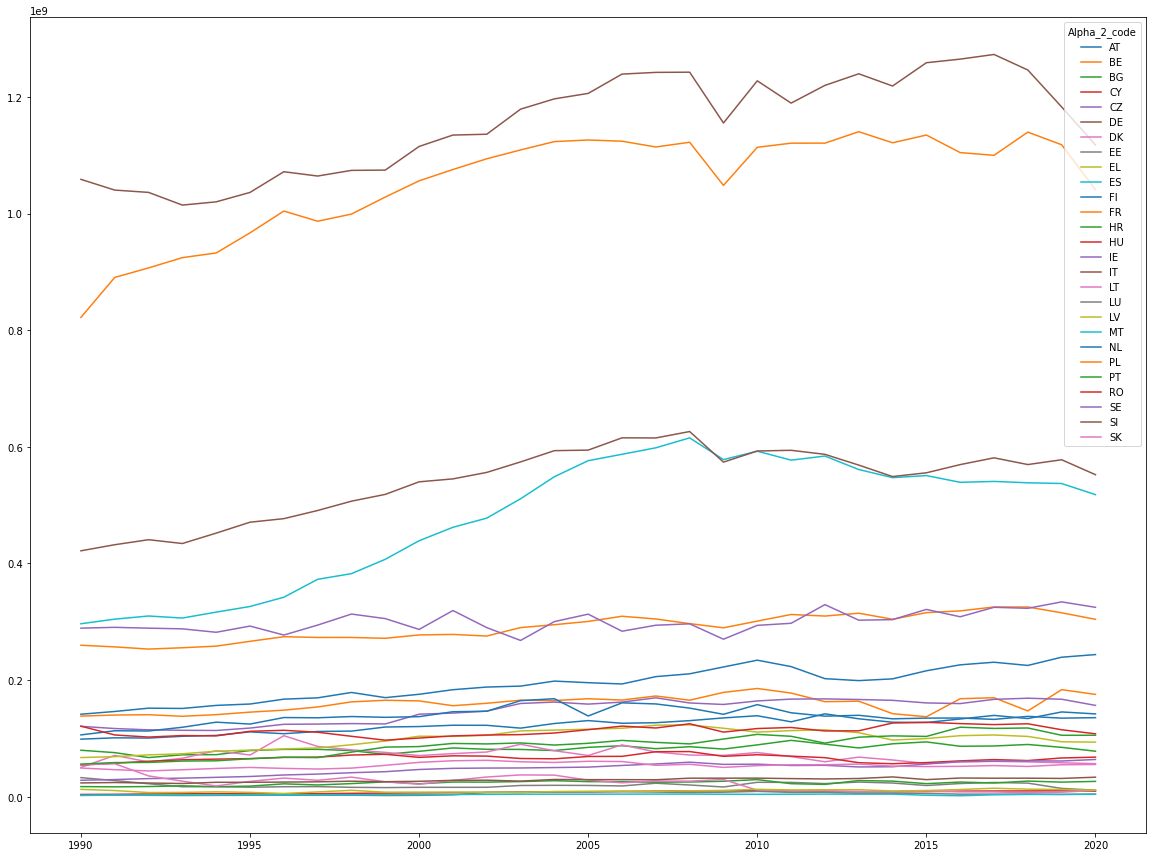

In [58]:
EU_production_annual_totals.loc[:,'1990':'2020'].T.plot(figsize=(20,15))

In [59]:
EU_production_annual_totals = EU_production_annual_totals.reset_index()[~EU_production_annual_totals.reset_index()['Alpha_2_code'].isin(['EA19', 'EU27_2020'])]
EU_production_annual_totals

,Alpha_2_code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AT,9.867000e+07,1.009820e+08,1.005620e+08,1.036050e+08,1.051240e+08,1.111680e+08,1.080350e+08,1.118460e+08,1.125120e+08,...,1.284048e+08,1.421287e+08,1.336163e+08,1.276865e+08,1.272271e+08,1.332687e+08,1.394180e+08,1.340016e+08,1.453354e+08,1.419908e+08
1,BE,1.381890e+08,1.400540e+08,1.405730e+08,1.379310e+08,1.406880e+08,1.450200e+08,1.484140e+08,1.538560e+08,1.626190e+08,...,1.777084e+08,1.629548e+08,1.637975e+08,1.423631e+08,1.370878e+08,1.680083e+08,1.697392e+08,1.471019e+08,1.835532e+08,1.754441e+08
2,BG,7.966000e+07,7.557300e+07,6.713900e+07,7.186300e+07,7.210500e+07,7.914000e+07,8.115000e+07,8.121600e+07,7.903500e+07,...,9.664100e+07,9.018800e+07,8.360200e+07,9.071600e+07,9.395500e+07,8.649800e+07,8.696409e+07,8.955208e+07,8.464791e+07,7.800151e+07
3,CY,3.901000e+06,4.109000e+06,4.721000e+06,5.043000e+06,5.237000e+06,4.849000e+06,5.073000e+06,5.304000e+06,5.802000e+06,...,9.628204e+06,9.260046e+06,8.409290e+06,8.495880e+06,8.848032e+06,9.555276e+06,9.782645e+06,9.887848e+06,1.005528e+07,9.499518e+06
4,CZ,1.206840e+08,1.169050e+08,1.146630e+08,1.138650e+08,1.135580e+08,1.177270e+08,1.241560e+08,1.245540e+08,1.253760e+08,...,1.673850e+08,1.677270e+08,1.666900e+08,1.652640e+08,1.608080e+08,1.597070e+08,1.669360e+08,1.688932e+08,1.671470e+08,1.565845e+08
5,DE,1.058597e+09,1.040211e+09,1.036251e+09,1.014497e+09,1.020059e+09,1.036213e+09,1.071703e+09,1.064306e+09,1.074014e+09,...,1.189370e+09,1.219745e+09,1.239627e+09,1.218680e+09,1.258601e+09,1.264781e+09,1.272776e+09,1.246119e+09,1.182781e+09,1.117560e+09
6,DK,5.026400e+07,7.087300e+07,5.956300e+07,6.593300e+07,7.884400e+07,7.146900e+07,1.045920e+08,8.620300e+07,8.033800e+07,...,6.877781e+07,5.990109e+07,6.788021e+07,6.299926e+07,5.686177e+07,5.961948e+07,6.066085e+07,5.968525e+07,5.821235e+07,5.661420e+07
7,EE,3.267900e+07,2.768800e+07,2.226800e+07,1.711000e+07,1.715800e+07,1.630000e+07,1.709000e+07,1.728300e+07,1.609500e+07,...,2.456000e+07,2.249400e+07,2.509800e+07,2.345900e+07,1.921083e+07,2.260360e+07,2.440895e+07,2.329697e+07,1.421568e+07,1.115006e+07
8,EL,6.714900e+07,6.867300e+07,7.177100e+07,7.358800e+07,7.800300e+07,7.993400e+07,8.186400e+07,8.366300e+07,8.908300e+07,...,1.133490e+08,1.146130e+08,1.097120e+08,9.717600e+07,9.968000e+07,1.046656e+08,1.058553e+08,1.033464e+08,9.418317e+07,9.358663e+07
9,ES,2.965740e+08,3.044520e+08,3.098780e+08,3.063660e+08,3.164980e+08,3.261860e+08,3.420490e+08,3.727770e+08,3.825150e+08,...,5.771250e+08,5.841326e+08,5.610301e+08,5.471293e+08,5.506625e+08,5.391158e+08,5.406440e+08,5.382790e+08,5.370530e+08,5.179640e+08


In [60]:
mask = EU_production_annual_totals.loc[:, '1990':'2020'] == 0

<AxesSubplot:>

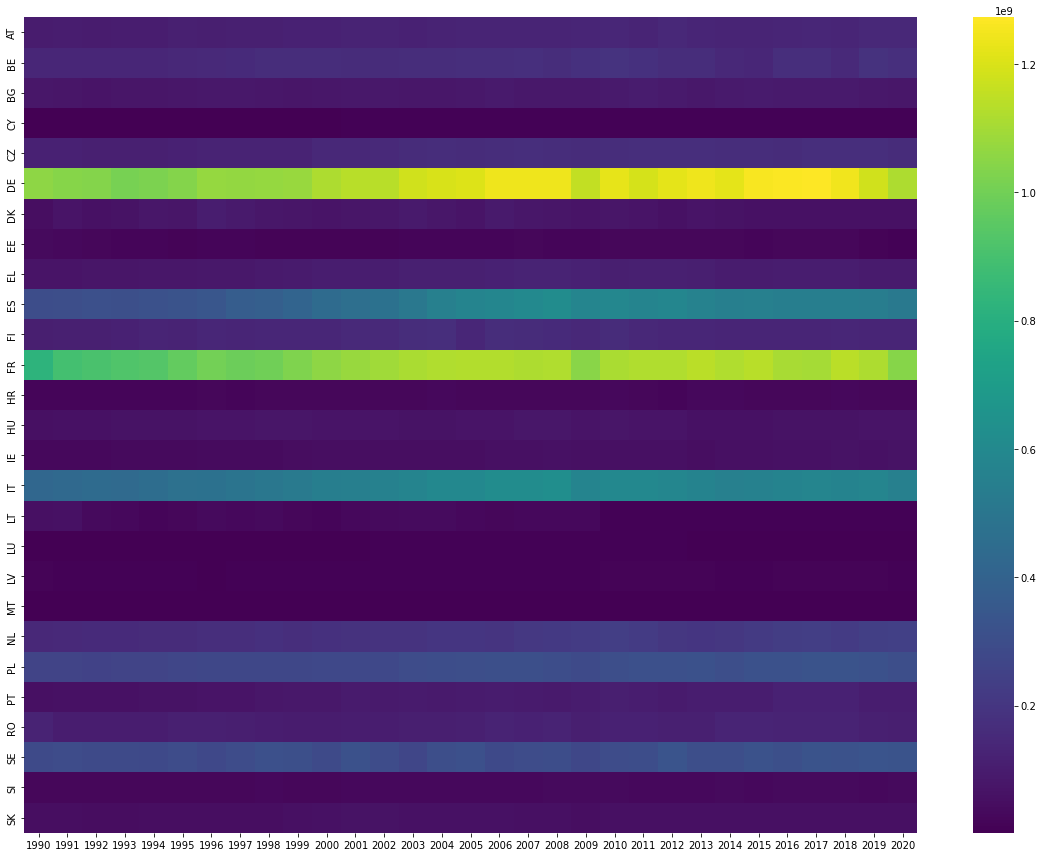

In [61]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(EU_production_annual_totals.loc[:, '1990':'2020'], yticklabels=EU_production_annual_totals['Alpha_2_code'], mask=mask, cmap="viridis")

Energy Balance Comparison

In [62]:
energy_balance_definitions = pd.read_csv('../raw_data/Energy_Balance.csv', sep=':')
energy_balance_definitions

,energy_balance,nrg_bal
0,Imports,IMP
1,Exports,EXP
2,Inlanddemand,ID
3,Transformationinput-electricityandheatgenerati...,TI_EHG_EDHP
4,Transformationinput-electricityandheatgenerati...,TI_EHG_EB
5,Transformationinput-electricityandheatgenerati...,TI_EHG_EPS_PURE
6,Transformationinput-electricityandheatgenerati...,TI_EHG_EPS_MIX
7,Energysector-energyuse,NRG_E
8,Energysector-electricityandheatgeneration-ener...,NRG_EHG_E
9,Energysector-coalmines-energyuse,NRG_CM_E


In [63]:
EU_production_annual_nrg_bal = EU_production_annual.groupby('nrg_bal').sum()
EU_production_annual_nrg_bal

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Numeric
nrg_bal,,,,,,,,,,,,,,,,,,,,,
GEP,2.275282e+09,2.316881e+09,2.303093e+09,2.303271e+09,2.340448e+09,2.409567e+09,2.495066e+09,2.506433e+09,2.560071e+09,2.586563e+09,...,2.939143e+09,2.920967e+09,2.861344e+09,2.906580e+09,2.928142e+09,2.960918e+09,2.943002e+09,2.907182e+09,2.786008e+09,10469.0
NEP,2.132427e+09,2.173244e+09,2.164366e+09,2.166376e+09,2.201617e+09,2.268070e+09,2.349735e+09,2.363865e+09,2.416847e+09,2.441604e+09,...,2.787011e+09,2.774247e+09,2.716848e+09,2.760960e+09,2.784040e+09,2.814921e+09,2.802324e+09,2.776012e+09,2.664236e+09,10469.0


In [64]:
EU_production_annual_nrg_bal.reset_index(inplace=True)

In [65]:
mask = EU_production_annual_nrg_bal.loc[:, '1990':'2020'] == 0


<AxesSubplot:>

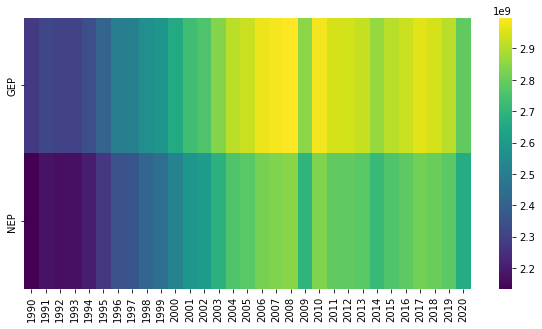

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(EU_production_annual_nrg_bal.loc[:, '1990':'2020'], yticklabels=EU_production_annual_nrg_bal['nrg_bal'], mask=mask, cmap="viridis")

<AxesSubplot:>

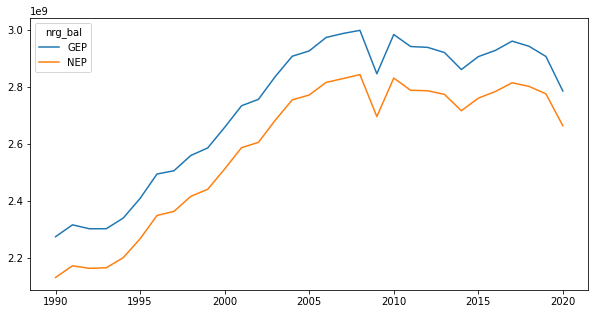

In [67]:
EU_production_annual_nrg_bal.set_index('nrg_bal').loc[:, '1990':'2020'].T.plot(figsize=(10,5))

<AxesSubplot:xlabel='2020', ylabel='Count'>

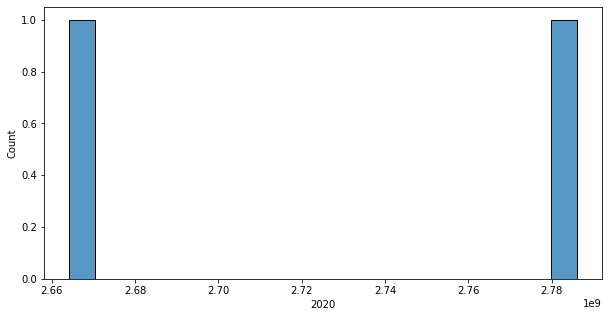

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(EU_production_annual_nrg_bal.set_index('nrg_bal')['2020'], bins=20)

In [69]:
EU_production_annual_nrg_bal_clusters = EU_production_annual_nrg_bal.groupby(EU_production_annual_nrg_bal.nrg_bal.str.partition("_")[0]).sum()
EU_production_annual_nrg_bal_clusters.index.name = 'nrg_bal_cluster'

There are only types of Energy Balance that are meaningful here: GEP and NEP. Therefore further analysis is not required

# Electricity Production analysis by country (example: Germany)

In [70]:
Elec_production_germany = EU_production_annual[EU_production_annual['Alpha_2_code'] == 'DE']
Elec_production_germany

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2014,2015,2016,2017,2018,2019,2020,Country,Alpha_3_code,Numeric
12821,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DE,550015000.0,539634000.0,537470000.0,...,627806000.0,648309000.0,650449000.0,653723000.0,640468000.0,606917000.0,572666000.0,Germany,DEU,276.0
13681,A,TOTAL,TOTAL,NEP,TOTAL,GWH,DE,508582000.0,500577000.0,498781000.0,...,590874000.0,610292000.0,614332000.0,619053000.0,605651000.0,575864000.0,544894000.0,Germany,DEU,276.0


In [71]:
Gross_Net_Elec_Prod_Germany = Elec_production_germany.groupby(Elec_production_germany['nrg_bal']).sum()
Gross_Net_Elec_Prod_Germany

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Numeric
nrg_bal,,,,,,,,,,,,,,,,,,,,,
GEP,550015000.0,539634000.0,537470000.0,526276000.0,529160000.0,537284000.0,555372000.0,551554000.0,556393000.0,556300000.0,...,628314000.0,638701000.0,627806000.0,648309000.0,650449000.0,653723000.0,640468000.0,606917000.0,572666000.0,276.0
NEP,508582000.0,500577000.0,498781000.0,488221000.0,490899000.0,498929000.0,516331000.0,512752000.0,517621000.0,518184000.0,...,591431000.0,600926000.0,590874000.0,610292000.0,614332000.0,619053000.0,605651000.0,575864000.0,544894000.0,276.0


<AxesSubplot:>

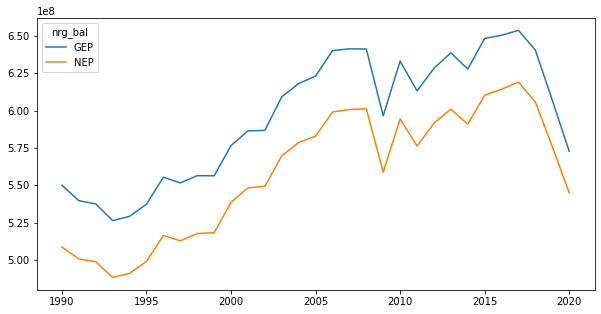

In [72]:
Gross_Net_Elec_Prod_Germany.loc[:, '1990':'2020'].T.plot(figsize=(10,5))

# Quartiles

In [73]:
def groupby_quartiles(df, columnname, quartiles_asc):
    df[columnname + '_perc'] = df[columnname]/df[columnname].sum()*100
    cumulative = df[columnname + '_perc'].sort_values(ascending=quartiles_asc).cumsum()
    
    
    if quartiles_asc == False:
        df['fourth_quartile'] = cumulative >= 75
        df['third_quartile'] = cumulative.between(50,75, inclusive='left')
        df['second_quartile'] = cumulative.between(25,50, inclusive='left')
        df['first_quartile'] = cumulative < 25
    
    elif quartiles_asc == True:
        df['first_quartile'] = cumulative <= 25
        df['second_quartile'] = cumulative.between(25,50, inclusive='right')
        df['third_quartile'] = cumulative.between(50,75, inclusive='right')
        df['fourth_quartile'] = cumulative > 75
    
    df['quartile'] = (df.iloc[:, 1:] == 1).idxmax(1)
   
#     df.set_index('quartile',inplace=True)
    
    df = df.loc[:,'1990':'2020']
#     df = df.groupby('quartile').sum()
    
    return df

In [74]:
EU_Elec_prod_NEP = EU_production_annual[EU_production_annual['nrg_bal']=='NEP'] 
# EU_Elec_prod_NEP = EU_production_annual['plants']=='TOTAL'
# EU_Elec_prod_NEP = EU_production_annual['operator']=='TOTAL'
# EU_Elec_prod_NEP

In [75]:
EU_Elec_prod_GEP = EU_production_annual[EU_production_annual['nrg_bal']=='GEP'] 

In [76]:
EU_Elec_prod_GEP_Quartiles = groupby_quartiles(EU_Elec_prod_GEP, '2020', quartiles_asc=True)
EU_Elec_prod_GEP_Quartiles

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12815,50294000.0,51483000.0,51190000.0,52421000.0,53132000.0,56225000.0,54880000.0,56704000.0,57001000.0,60944000.0,...,65813093.0,72603457.0,68356635.0,65438872.0,65299423.0,68308186.0,71324414.0,68617889.0,74234304.0,72566304.0
12817,70923000.0,71936000.0,72225000.0,70834000.0,72179000.0,74408000.0,76099000.0,78833000.0,83183000.0,84514000.0,...,90587900.0,83036100.0,83497700.0,72545300.0,69708200.0,85607500.0,86616300.0,75036800.0,93639800.0,89389000.0
12818,42141000.0,40862000.0,35610000.0,37997000.0,38133000.0,41789000.0,42716000.0,42803000.0,41711000.0,38248000.0,...,50797000.0,47329000.0,43784000.0,47485000.0,49228000.0,45277000.0,45612786.0,46837670.0,44301773.0,40766577.0
12819,1974000.0,2077000.0,2430000.0,2590000.0,2685000.0,2497000.0,2609000.0,2728000.0,2991000.0,3139000.0,...,4929602.0,4717023.0,4290145.0,4350440.0,4534516.0,4887638.0,5004365.0,5060567.0,5141491.0,4849201.0
12820,62559000.0,60528000.0,59293000.0,58881000.0,58705000.0,60847000.0,64257000.0,64598000.0,65112000.0,64694000.0,...,87477000.0,87418000.0,86913000.0,86148000.0,83892000.0,83309000.0,87050264.0,88032022.0,87030605.0,81517186.0
12821,550015000.0,539634000.0,537470000.0,526276000.0,529160000.0,537284000.0,555372000.0,551554000.0,556393000.0,556300000.0,...,613123000.0,628314000.0,638701000.0,627806000.0,648309000.0,650449000.0,653723000.0,640468000.0,606917000.0,572666000.0
12822,25982000.0,36545000.0,30738000.0,33974000.0,40578000.0,36759000.0,53582000.0,44315000.0,41113000.0,38920000.0,...,35229069.0,30700702.0,34742088.0,32184012.0,28940632.0,30538406.0,31022552.0,30369763.0,29522796.0,28733603.0
12824,17206000.0,14627000.0,11831000.0,9117000.0,9152000.0,8693000.0,9103000.0,9218000.0,8557000.0,8278000.0,...,12893000.0,11967000.0,13275000.0,12446000.0,10148830.0,12169924.0,13160460.0,12364171.0,7615585.0,5955864.0
12825,35003000.0,35815000.0,37411000.0,38396000.0,40624000.0,41552000.0,42567000.0,43506000.0,46329000.0,49632000.0,...,59436000.0,60959000.0,57152000.0,50474000.0,51874000.0,54438584.0,55266089.0,53262785.0,48626171.0,48251884.0
12826,151923000.0,155801000.0,158722000.0,156802000.0,161853000.0,167090000.0,174459000.0,190402000.0,195216000.0,208247000.0,...,293847000.0,297558624.0,285631120.0,278749282.0,280911454.0,274771767.0,275726000.0,274452000.0,273257000.0,263373000.0


In [77]:
EU_Elec_prod_NEP_Quartiles = groupby_quartiles(EU_Elec_prod_NEP, '2020', quartiles_asc=True)
EU_Elec_prod_NEP_Quartiles

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13675,48376000.0,49499000.0,49372000.0,51184000.0,51992000.0,54943000.0,53155000.0,55142000.0,55511000.0,58550000.0,...,62591740.0,69525214.0,65259696.0,62247597.0,61927725.0,64960511.0,68093595.0,65383711.0,71101128.0,69424515.0
13677,67266000.0,68118000.0,68348000.0,67097000.0,68509000.0,70612000.0,72315000.0,75023000.0,79436000.0,80844000.0,...,87120500.0,79918700.0,80299800.0,69817800.0,67379600.0,82400800.0,83122900.0,72065100.0,89913400.0,86055100.0
13678,37519000.0,34711000.0,31529000.0,33866000.0,33972000.0,37351000.0,38434000.0,38413000.0,37324000.0,34322000.0,...,45844000.0,42859000.0,39818000.0,43231000.0,44727000.0,41221000.0,41351303.0,42714415.0,40346135.0,37234936.0
13679,1927000.0,2032000.0,2291000.0,2453000.0,2552000.0,2352000.0,2464000.0,2576000.0,2811000.0,2986000.0,...,4698602.0,4543023.0,4119145.0,4145440.0,4313516.0,4667638.0,4778280.0,4827281.0,4913788.0,4650317.0
13680,58125000.0,56377000.0,55370000.0,54984000.0,54853000.0,56880000.0,59899000.0,59956000.0,60264000.0,60092000.0,...,79908000.0,80309000.0,79777000.0,79116000.0,76916000.0,76398000.0,79885766.0,80861141.0,80116433.0,75067275.0
13681,508582000.0,500577000.0,498781000.0,488221000.0,490899000.0,498929000.0,516331000.0,512752000.0,517621000.0,518184000.0,...,576247000.0,591431000.0,600926000.0,590874000.0,610292000.0,614332000.0,619053000.0,605651000.0,575864000.0,544894000.0
13682,24282000.0,34328000.0,28825000.0,31959000.0,38266000.0,34710000.0,51010000.0,41888000.0,39225000.0,37045000.0,...,33548743.0,29200389.0,33138124.0,30815249.0,27921142.0,29081071.0,29638300.0,29315485.0,28689557.0,27880596.0
13684,15473000.0,13061000.0,10437000.0,7993000.0,8006000.0,7607000.0,7987000.0,8065000.0,7538000.0,7352000.0,...,11667000.0,10527000.0,11823000.0,11013000.0,9062000.0,10433677.0,11248492.0,10932802.0,6600100.0,5194192.0
13685,32146000.0,32858000.0,34360000.0,35192000.0,37379000.0,38382000.0,39297000.0,40157000.0,42754000.0,45793000.0,...,53913000.0,53654000.0,52560000.0,46702000.0,47806000.0,50227000.0,50589215.0,50083654.0,45557000.0,45334743.0
13686,144651000.0,148651000.0,151156000.0,149564000.0,154645000.0,159096000.0,167590000.0,182375000.0,187299000.0,198884000.0,...,283278000.0,286574000.0,275399000.0,268380000.0,269751000.0,264344000.0,264918000.0,263827000.0,263796000.0,254591000.0


In [78]:
Top_EU_NEP = EU_Elec_prod_NEP[EU_Elec_prod_NEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])]
Top_EU_NEP

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2020,Country,Alpha_3_code,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile,quartile
13681,A,TOTAL,TOTAL,NEP,TOTAL,GWH,DE,508582000.0,500577000.0,498781000.0,...,544894000.0,Germany,DEU,276.0,20.452167,False,False,False,True,fourth_quartile
13686,A,TOTAL,TOTAL,NEP,TOTAL,GWH,ES,144651000.0,148651000.0,151156000.0,...,254591000.0,Spain,ESP,724.0,9.555873,False,False,True,False,third_quartile
13689,A,TOTAL,TOTAL,NEP,TOTAL,GWH,FR,401151276.0,434914728.0,443129904.0,...,509273719.0,France,FRA,250.0,19.115188,False,False,False,True,fourth_quartile
13695,A,TOTAL,TOTAL,NEP,TOTAL,GWH,IT,205064000.0,210290000.0,214443000.0,...,271647989.0,Italy,ITA,380.0,10.196093,False,False,True,False,third_quartile


In [79]:
Top_EU_GEP = EU_Elec_prod_GEP[EU_Elec_prod_GEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])]
Top_EU_GEP

,freq,plants,operator,nrg_bal,siec,unit,Alpha_2_code,1990,1991,1992,...,2020,Country,Alpha_3_code,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile,quartile
12821,A,TOTAL,TOTAL,GEP,TOTAL,GWH,DE,550015000.0,539634000.0,537470000.0,...,572666000.0,Germany,DEU,276.0,20.555074,False,False,False,True,fourth_quartile
12826,A,TOTAL,TOTAL,GEP,TOTAL,GWH,ES,151923000.0,155801000.0,158722000.0,...,263373000.0,Spain,ESP,724.0,9.453419,False,False,True,False,third_quartile
12829,A,TOTAL,TOTAL,GEP,TOTAL,GWH,FR,420751327.0,455554705.0,463638772.0,...,531762263.0,France,FRA,250.0,19.086890,False,False,False,True,fourth_quartile
12835,A,TOTAL,TOTAL,GEP,TOTAL,GWH,IT,216600000.0,221816000.0,226254000.0,...,280531014.0,Italy,ITA,380.0,10.069283,False,False,True,False,third_quartile


In [80]:
DE_FR_ES_IT_GEP = pd.DataFrame(EU_Elec_prod_GEP[EU_Elec_prod_GEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])].sum(numeric_only=True))
DE_FR_ES_IT_GEP.rename(columns={0: 'DE, FR, ES, IT Combined GEP'}, inplace=True)
DE_FR_ES_IT_GEP.reset_index()

,index,"DE, FR, ES, IT Combined GEP"
0,1990,1.339289e+09
1,1991,1.372806e+09
2,1992,1.386085e+09
3,1993,1.378587e+09
4,1994,1.399694e+09
5,1995,1.440137e+09
6,1996,1.487662e+09
7,1997,1.498199e+09
8,1998,1.522685e+09
9,1999,1.556020e+09


In [81]:
DE_FR_ES_IT_NEP = pd.DataFrame(EU_Elec_prod_NEP[EU_Elec_prod_NEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])].sum(numeric_only=True))
DE_FR_ES_IT_NEP.rename(columns={0: 'DE, FR, ES, IT Combined NEP'}, inplace=True)
DE_FR_ES_IT_NEP.reset_index()


,index,"DE, FR, ES, IT Combined NEP"
0,1990,1.259448e+09
1,1991,1.294433e+09
2,1992,1.307510e+09
3,1993,1.300841e+09
4,1994,1.321221e+09
5,1995,1.359841e+09
6,1996,1.407147e+09
7,1997,1.416480e+09
8,1998,1.439638e+09
9,1999,1.472289e+09


In [82]:
Others_NEP=pd.DataFrame(EU_Elec_prod_NEP[~EU_Elec_prod_NEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])].sum(numeric_only=True))
Others_NEP.rename(columns={0: 'Others NEP'}, inplace=True)
Others_NEP.reset_index()

,index,Others NEP
0,1990,8.729783e+08
1,1991,8.788114e+08
2,1992,8.568562e+08
3,1993,8.655357e+08
4,1994,8.803961e+08
5,1995,9.082295e+08
6,1996,9.425877e+08
7,1997,9.473851e+08
8,1998,9.772095e+08
9,1999,9.693150e+08


In [83]:
Others_GEP=pd.DataFrame(EU_Elec_prod_GEP[~EU_Elec_prod_GEP['Alpha_2_code'].isin(['DE','FR', 'ES', 'IT'])].sum(numeric_only=True))
Others_GEP.rename(columns={0: 'Others GEP'}, inplace=True)
Others_GEP.reset_index()

,index,Others GEP
0,1990,9.359926e+08
1,1991,9.440757e+08
2,1992,9.170078e+08
3,1993,9.246840e+08
4,1994,9.407543e+08
5,1995,9.694295e+08
6,1996,1.007404e+09
7,1997,1.008234e+09
8,1998,1.037386e+09
9,1999,1.030543e+09


In [84]:
Top_EU_vs_Others_NEP = DE_FR_ES_IT_NEP.join(Others_NEP)
Top_EU_vs_Others_NEP

,"DE, FR, ES, IT Combined NEP",Others NEP
1990,1.259448e+09,8.729783e+08
1991,1.294433e+09,8.788114e+08
1992,1.307510e+09,8.568562e+08
1993,1.300841e+09,8.655357e+08
1994,1.321221e+09,8.803961e+08
1995,1.359841e+09,9.082295e+08
1996,1.407147e+09,9.425877e+08
1997,1.416480e+09,9.473851e+08
1998,1.439638e+09,9.772095e+08
1999,1.472289e+09,9.693150e+08


In [85]:
Top_EU_vs_Others_GEP = DE_FR_ES_IT_NEP.join(Others_GEP)
Top_EU_vs_Others_GEP

,"DE, FR, ES, IT Combined NEP",Others GEP
1990,1.259448e+09,9.359926e+08
1991,1.294433e+09,9.440757e+08
1992,1.307510e+09,9.170078e+08
1993,1.300841e+09,9.246840e+08
1994,1.321221e+09,9.407543e+08
1995,1.359841e+09,9.694295e+08
1996,1.407147e+09,1.007404e+09
1997,1.416480e+09,1.008234e+09
1998,1.439638e+09,1.037386e+09
1999,1.472289e+09,1.030543e+09


In [86]:
# Others['Alpha_2_code']='Others'
# DE_FR_ES_IT_NEP = DE_FR_ES_IT_NEP.append(Others, ignore_index=True)
# DE_FR_ES_IT_NEP = DE_FR_ES_IT_NEP.drop(columns=['freq', 'plants', 'operator', 'nrg_bal', 'siec','unit','Country', 'Alpha_3_code', 'Numeric','2020_perc',	'first_quartile',	'second_quartile',	'third_quartile',	'fourth_quartile',	'quartile' ])

In [87]:
Top_EU_vs_Others_GEP=Top_EU_vs_Others_GEP.iloc[:31]
Top_EU_vs_Others_GEP

,"DE, FR, ES, IT Combined NEP",Others GEP
1990,1.259448e+09,9.359926e+08
1991,1.294433e+09,9.440757e+08
1992,1.307510e+09,9.170078e+08
1993,1.300841e+09,9.246840e+08
1994,1.321221e+09,9.407543e+08
1995,1.359841e+09,9.694295e+08
1996,1.407147e+09,1.007404e+09
1997,1.416480e+09,1.008234e+09
1998,1.439638e+09,1.037386e+09
1999,1.472289e+09,1.030543e+09


In [88]:
Top_EU_vs_Others_NEP=Top_EU_vs_Others_NEP.iloc[:31]
Top_EU_vs_Others_NEP

,"DE, FR, ES, IT Combined NEP",Others NEP
1990,1.259448e+09,8.729783e+08
1991,1.294433e+09,8.788114e+08
1992,1.307510e+09,8.568562e+08
1993,1.300841e+09,8.655357e+08
1994,1.321221e+09,8.803961e+08
1995,1.359841e+09,9.082295e+08
1996,1.407147e+09,9.425877e+08
1997,1.416480e+09,9.473851e+08
1998,1.439638e+09,9.772095e+08
1999,1.472289e+09,9.693150e+08


<AxesSubplot:title={'center':'Top EU NEP Countries'}>

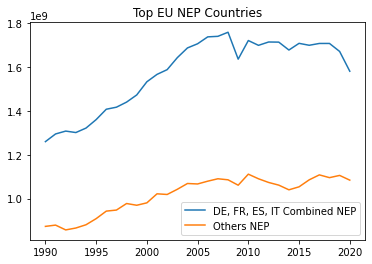

In [89]:
Top_EU_vs_Others_NEP.plot(title='Top EU NEP Countries')

<AxesSubplot:title={'center':'Top EU GEP Countries'}>

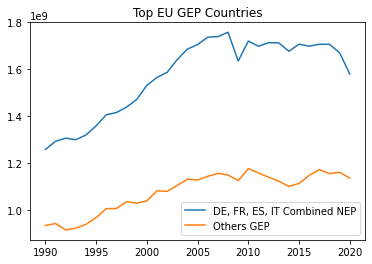

In [90]:
Top_EU_vs_Others_GEP.plot(title='Top EU GEP Countries')

In [91]:
# DE_FR_ES_IT_NEP.set_index('Alpha_2_code').T.plot()

In [92]:
EU_Elec_prod_GEP.groupby(['quartile']).sum()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2017,2018,2019,2020,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile
quartile,,,,,,,,,,,,,,,,,,,,,
first_quartile,581199200.0,587582100.0,5.605360e+08,567846000.0,5.824870e+08,6.009160e+08,6.381460e+08,6.296720e+08,6.446510e+08,6.468350e+08,...,7.217519e+08,7.088908e+08,7.084625e+08,6.922451e+08,6943.0,24.847206,20,0,0,0
fourth_quartile,970766327.0,995188705.0,1.001109e+09,998982756.0,1.006028e+09,1.031558e+09,1.068770e+09,1.056324e+09,1.067669e+09,1.082106e+09,...,1.215700e+09,1.222253e+09,1.177830e+09,1.104428e+09,526.0,39.641964,0,0,0,2
second_quartile,354793420.0,356493630.0,3.564718e+08,356838019.0,3.582673e+08,3.685135e+08,3.692580e+08,3.785616e+08,3.927347e+08,3.837085e+08,...,4.519103e+08,4.476974e+08,4.537797e+08,4.454305e+08,1896.0,15.988128,0,3,0,0
third_quartile,368523000.0,377617000.0,3.849760e+08,379604000.0,3.936660e+08,4.085790e+08,4.188920e+08,4.418750e+08,4.550160e+08,4.739140e+08,...,5.715560e+08,5.641604e+08,5.671102e+08,5.439040e+08,1104.0,19.522702,0,0,2,0


In [93]:
EU_Elec_prod_NEP.groupby(['quartile']).sum()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2017,2018,2019,2020,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile
quartile,,,,,,,,,,,,,,,,,,,,,
first_quartile,537592900.0,541806763.0,519340358.0,527777684.0,541941814.0,558791952.0,5.929978e+08,589040539.0,6.049038e+08,6.061205e+08,...,6.790366e+08,6.694242e+08,6.704951e+08,6.566068e+08,6943.0,24.645218,20,0,0,0
fourth_quartile,909733276.0,935491728.0,941910904.0,939905625.0,946403677.0,971528990.0,1.007183e+09,994808334.0,1.005386e+09,1.020657e+09,...,1.156902e+09,1.163449e+09,1.122907e+09,1.054168e+09,526.0,39.567355,0,0,0,2
second_quartile,335385420.0,337004630.0,337515805.0,337758019.0,338454260.0,349437526.0,3.495900e+08,358344555.0,3.723057e+08,3.631945e+08,...,4.287981e+08,4.257792e+08,4.348642e+08,4.272225e+08,1896.0,16.035461,0,3,0,0
third_quartile,349715000.0,358941000.0,365599000.0,360935000.0,374817000.0,388312000.0,3.999640e+08,421672000.0,4.342520e+08,4.516320e+08,...,5.501836e+08,5.436716e+08,5.477461e+08,5.262390e+08,1104.0,19.751966,0,0,2,0


In [94]:
EU_Elec_prod_GEP.groupby(['quartile', 'Alpha_2_code']).first()

freq plants operator nrg_bal   siec unit  \
quartile        Alpha_2_code                                            
first_quartile  AT              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                BE              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                BG              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                CY              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                CZ              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                DK              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                EE              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                EL              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                FI              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                HR              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                HU              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                IE              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                LT              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                LU              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                LV              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                MT              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                PT              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                RO              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                SI              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                SK              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
fourth_quartile DE              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                FR              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
second_quartile NL              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                PL              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                SE              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
third_quartile  ES              A  TOTAL    TOTAL     GEP  TOTAL  GWH   
                IT              A  TOTAL    TOTAL     GEP  TOTAL  GWH   

                                     1990         1991         1992  \
quartile        Alpha_2_code                                          
first_quartile  AT             50294000.0   51483000.0   51190000.0   
                BE             70923000.0   71936000.0   72225000.0   
                BG             42141000.0   40862000.0   35610000.0   
                CY              1974000.0    2077000.0    2430000.0   
                CZ             62559000.0   60528000.0   59293000.0   
                DK             25982000.0   36545000.0   30738000.0   
                EE             17206000.0   14627000.0   11831000.0   
                EL             35003000.0   35815000.0   37411000.0   
                FI             54377000.0   57986000.0   57725000.0   
                HR              8873200.0    8605100.0    8902000.0   
                HU             28436000.0   29963000.0   31685000.0   
                IE             14515000.0   15148000.0   16013000.0   
                LT             28405000.0   29363000.0   18707000.0   
                LU              1377000.0    1415000.0    1198000.0   
                LV              6648000.0    5644000.0    3834000.0   
                MT              1100000.0    1419000.0    1490000.0   
                PT             28501000.0   29872000.0   30088000.0   
                RO             64309000.0   56803000.0   54195000.0   
                SI             12444000.0   12744000.0   12344000.0   
                SK             26132000.0   24747000.0   23627000.0   
fourth_quartile DE            550015000.0  539634000.0  537470000.0   
                FR            420751327.0  455554705.0  463638772.0   
second_quartile NL             71968420.0   74383630.0   77256805.0   
                PL            136311000.0  134714000.0  132750000.0   
                SE            146514000.0  147396000.0  146465000

In [95]:
EU_Elec_prod_NEP.groupby(['quartile', 'Alpha_2_code']).first()

freq plants operator nrg_bal   siec unit  \
quartile        Alpha_2_code                                            
first_quartile  AT              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                BE              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                BG              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                CY              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                CZ              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                DK              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                EE              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                EL              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                FI              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                HR              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                HU              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                IE              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                LT              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                LU              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                LV              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                MT              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                PT              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                RO              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                SI              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                SK              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
fourth_quartile DE              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                FR              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
second_quartile NL              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                PL              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                SE              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
third_quartile  ES              A  TOTAL    TOTAL     NEP  TOTAL  GWH   
                IT              A  TOTAL    TOTAL     NEP  TOTAL  GWH   

                                     1990         1991         1992  \
quartile        Alpha_2_code                                          
first_quartile  AT             48376000.0   49499000.0   49372000.0   
                BE             67266000.0   68118000.0   68348000.0   
                BG             37519000.0   34711000.0   31529000.0   
                CY              1927000.0    2032000.0    2291000.0   
                CZ             58125000.0   56377000.0   55370000.0   
                DK             24282000.0   34328000.0   28825000.0   
                EE             15473000.0   13061000.0   10437000.0   
                EL             32146000.0   32858000.0   34360000.0   
                FI             51591000.0   55098000.0   54957000.0   
                HR              8459900.0    8337400.0    8530000.0   
                HU             25899000.0   27465000.0   29119000.0   
                IE             13650000.0   14243000.0   15037000.0   
                LT             26296000.0   27158000.0   16947000.0   
                LU              1333000.0    1337000.0    1153000.0   
                LV              5922000.0    4949000.0    3279000.0   
                MT              1010000.0    1314000.0    1376000.0   
                PT             27449000.0   28638363.0   28699358.0   
                RO             56669000.0   49070000.0   48058000.0   
                SI             11178000.0   11586000.0   11084000.0   
                SK             23022000.0   21627000.0   20569000.0   
fourth_quartile DE            508582000.0  500577000.0  498781000.0   
                FR            401151276.0  434914728.0  443129904.0   
second_quartile NL             69464420.0   71783630.0   74573805.0   
                PL            123410000.0  122181000.0  120409000.0   
                SE            142511000.0  143040000.0  142533000

In [96]:
EU_Elec_prod_GEP_Quartiles= EU_Elec_prod_GEP.groupby(['quartile']).sum()
EU_Elec_prod_GEP_Quartiles

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2017,2018,2019,2020,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile
quartile,,,,,,,,,,,,,,,,,,,,,
first_quartile,581199200.0,587582100.0,5.605360e+08,567846000.0,5.824870e+08,6.009160e+08,6.381460e+08,6.296720e+08,6.446510e+08,6.468350e+08,...,7.217519e+08,7.088908e+08,7.084625e+08,6.922451e+08,6943.0,24.847206,20,0,0,0
fourth_quartile,970766327.0,995188705.0,1.001109e+09,998982756.0,1.006028e+09,1.031558e+09,1.068770e+09,1.056324e+09,1.067669e+09,1.082106e+09,...,1.215700e+09,1.222253e+09,1.177830e+09,1.104428e+09,526.0,39.641964,0,0,0,2
second_quartile,354793420.0,356493630.0,3.564718e+08,356838019.0,3.582673e+08,3.685135e+08,3.692580e+08,3.785616e+08,3.927347e+08,3.837085e+08,...,4.519103e+08,4.476974e+08,4.537797e+08,4.454305e+08,1896.0,15.988128,0,3,0,0
third_quartile,368523000.0,377617000.0,3.849760e+08,379604000.0,3.936660e+08,4.085790e+08,4.188920e+08,4.418750e+08,4.550160e+08,4.739140e+08,...,5.715560e+08,5.641604e+08,5.671102e+08,5.439040e+08,1104.0,19.522702,0,0,2,0


In [97]:
EU_Elec_prod_NEP_Quartiles= EU_Elec_prod_NEP.groupby(['quartile']).sum()
EU_Elec_prod_NEP_Quartiles

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2017,2018,2019,2020,Numeric,2020_perc,first_quartile,second_quartile,third_quartile,fourth_quartile
quartile,,,,,,,,,,,,,,,,,,,,,
first_quartile,537592900.0,541806763.0,519340358.0,527777684.0,541941814.0,558791952.0,5.929978e+08,589040539.0,6.049038e+08,6.061205e+08,...,6.790366e+08,6.694242e+08,6.704951e+08,6.566068e+08,6943.0,24.645218,20,0,0,0
fourth_quartile,909733276.0,935491728.0,941910904.0,939905625.0,946403677.0,971528990.0,1.007183e+09,994808334.0,1.005386e+09,1.020657e+09,...,1.156902e+09,1.163449e+09,1.122907e+09,1.054168e+09,526.0,39.567355,0,0,0,2
second_quartile,335385420.0,337004630.0,337515805.0,337758019.0,338454260.0,349437526.0,3.495900e+08,358344555.0,3.723057e+08,3.631945e+08,...,4.287981e+08,4.257792e+08,4.348642e+08,4.272225e+08,1896.0,16.035461,0,3,0,0
third_quartile,349715000.0,358941000.0,365599000.0,360935000.0,374817000.0,388312000.0,3.999640e+08,421672000.0,4.342520e+08,4.516320e+08,...,5.501836e+08,5.436716e+08,5.477461e+08,5.262390e+08,1104.0,19.751966,0,0,2,0


<AxesSubplot:>

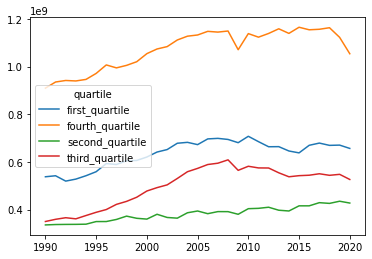

In [98]:
EU_Elec_prod_NEP_Quartiles.loc[:,'1990':'2020'].T.plot()

<AxesSubplot:>

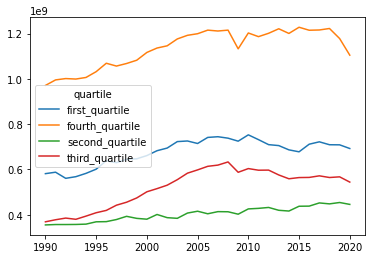

In [99]:
EU_Elec_prod_GEP_Quartiles.loc[:,'1990':'2020'].T.plot()

In [101]:
# fig = px.line(EU_Elec_prod_NEP_Quartiles, x=['columns'], y='quartile', labels={
#                      'x': 'Years',
#                      'y': 'EU countries grouped into quartiles'
#                  },title="Top EU Electricity Producers")
# fig.show()